# ![](sparksfoundation.png)

# Kshitij Tripathi- Data Science and Business Analytics Intern at Sparks Foundation "GRIPJAN21"  

# Task 3:- Exploratory Data Analysis-Retail  

# Objective 2:- Finding out weak areas where you can work to make more profit & deriving business problems.

# Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
store_data=pd.read_csv("SampleSuperstore.csv")
store_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Data Inspection 

In [3]:
#inspecting null values
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

In [5]:
#removing identical rows
shape1=store_data.shape
store_data.drop_duplicates(keep='first',inplace=True)
shape2=store_data.shape
print("Total identical values {}".format(shape1[0]-shape2[0]))

Total identical values 17


# Exploratory Data Analysis 

In [6]:
profit_and_sales=store_data.groupby("Segment").sum().iloc[:,[-1,1]].sum()
print("Total profit of the store is:- {} USD".format(round(profit_and_sales[0],2)))
print("Total sale of the store is:- {} USD".format(round(profit_and_sales[1],2)))

Total profit of the store is:- 286241.42 USD
Total sale of the store is:- 2296195.59 USD


Top 10 states with highest sales are as follows:- State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Florida          89473.7080
Illinois         80162.5370
Ohio             77976.7640
Michigan         75879.6440
Virginia         70636.7200
Name: Sales, dtype: float64


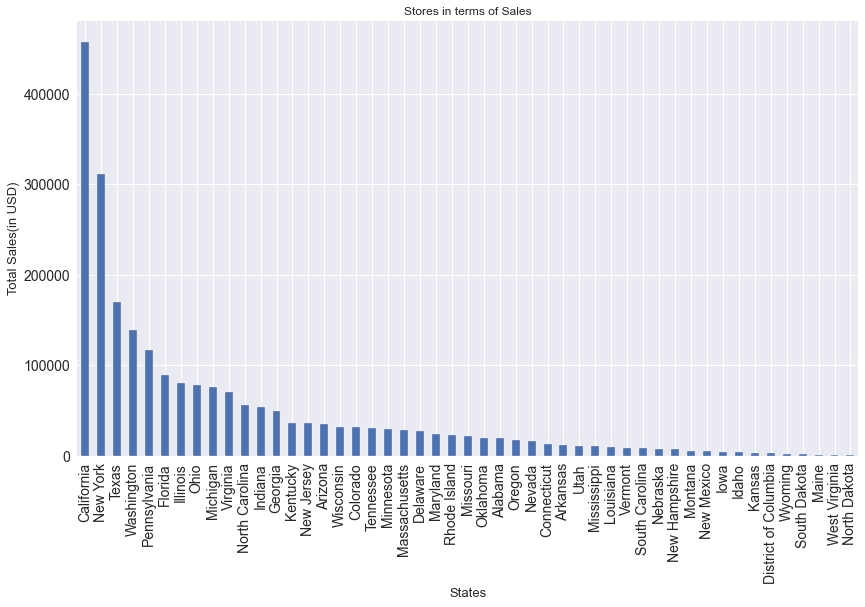

In [38]:
state_sale=store_data.groupby("State").Sales.sum().sort_values(ascending=False)
print("Top 10 states with highest sales are as follows:- {}".format(state_sale[0:10]))
plt.style.use('seaborn')
state_sale.plot(kind='bar',figsize=(14,8),fontsize=14)
plt.xlabel('States',fontsize=13)
plt.ylabel('Total Sales(in USD)',fontsize=13)
plt.title("Stores in terms of Sales")
plt.show()

Top 10 states with highest profit are as follows:- State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


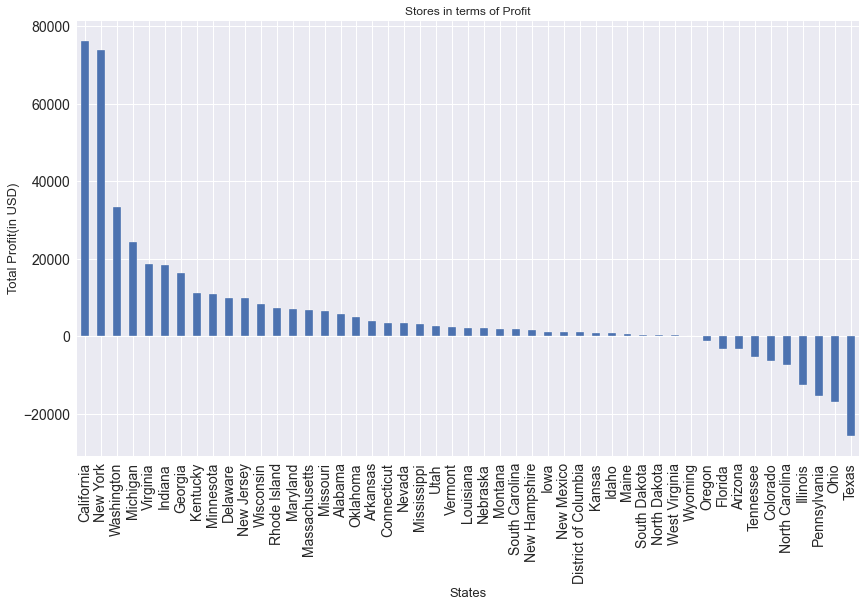

In [39]:
state_profit=store_data.groupby("State").Profit.sum().sort_values(ascending=False)
print("Top 10 states with highest profit are as follows:- {}".format(state_profit[0:10]))
plt.style.use('seaborn')
state_profit.plot(kind='bar',figsize=(14,8),fontsize=14)
plt.xlabel('States',fontsize=13)
plt.ylabel('Total Profit(in USD)',fontsize=13)
plt.title("Stores in terms of Profit")
plt.show()

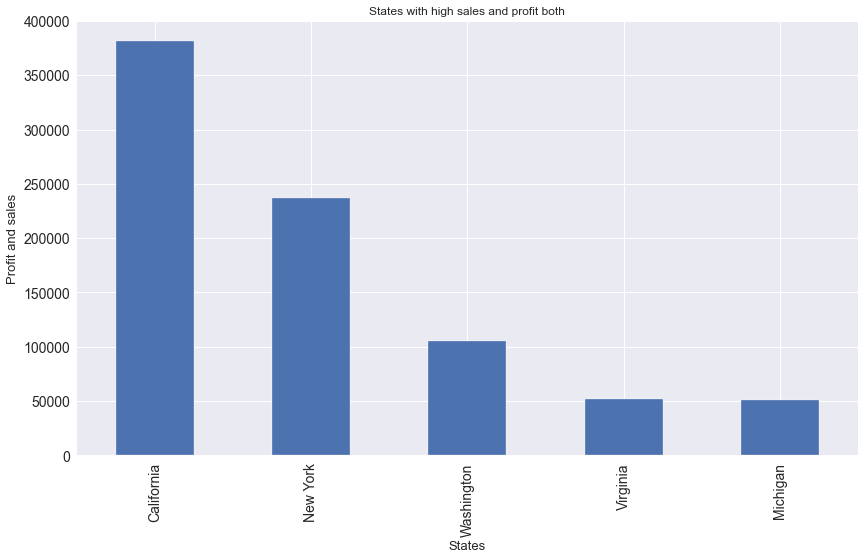

In [40]:
states_with_high_sales_and_profit=state_sale[0:10].sort_values(ascending=False)-state_profit[0:10].sort_values(ascending=False)
states_with_high_sales_and_profit.sort_values(ascending=False,inplace=True)
states_with_high_sales_and_profit.dropna(axis=0,how='any',inplace=True)
plt.style.use('seaborn')
states_with_high_sales_and_profit.plot(kind='bar',figsize=(14,8),fontsize=14)
plt.xlabel('States',fontsize=13)
plt.ylabel('Profit and sales',fontsize=13)
plt.title("States with high sales and profit both")
plt.show()

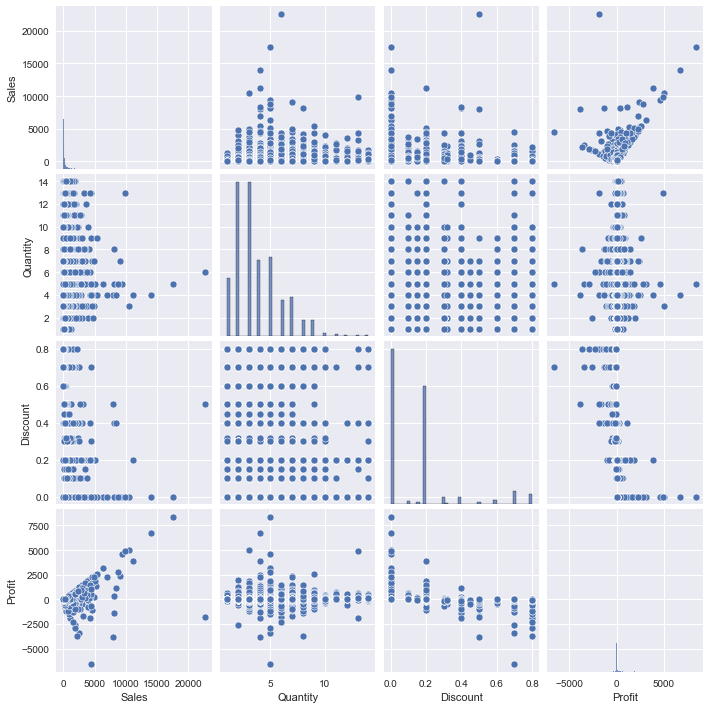

In [10]:
# For understanding relation between Sales,Quantity,Discount, and Profit
financial=store_data.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

<AxesSubplot:>

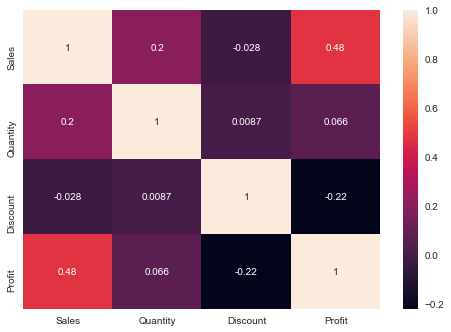

In [11]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [12]:
main_data=store_data[(store_data.State=='California') | (store_data.State=='Michigen') | (store_data.State=='New York') | (store_data.State=='Virginia') | (store_data.State=='Washington')]
len(main_data)

3849

As California, Michigen,New York,Virginia, and Washington have high sales and profit, so now we will try to find out the reson behind that.
So first we will start with states with zero discount

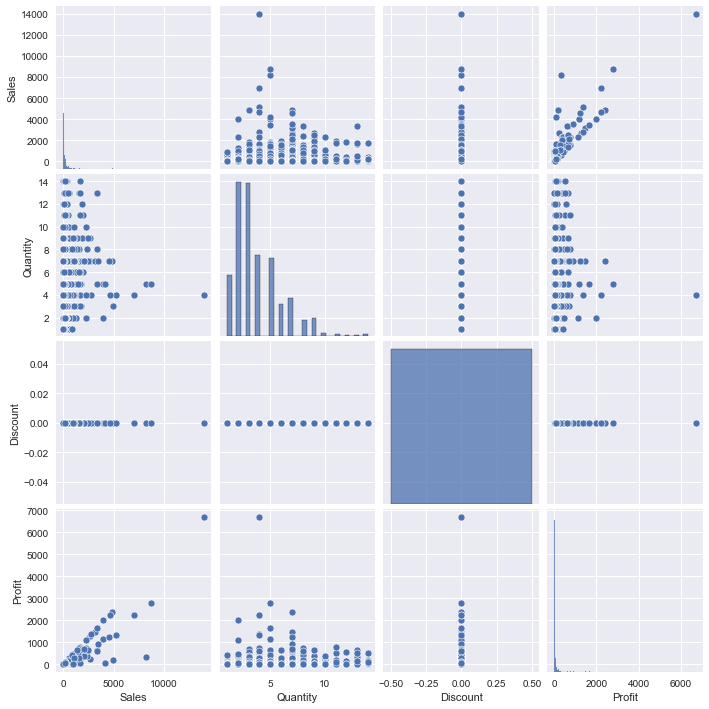

In [13]:
main_data_discout_zero=main_data[main_data['Discount']==0]
main_financial=main_data_discout_zero.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(main_financial)

<AxesSubplot:>

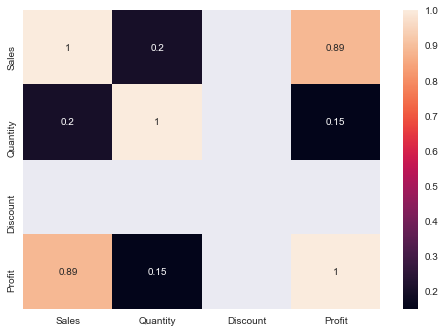

In [14]:
corr=main_financial.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

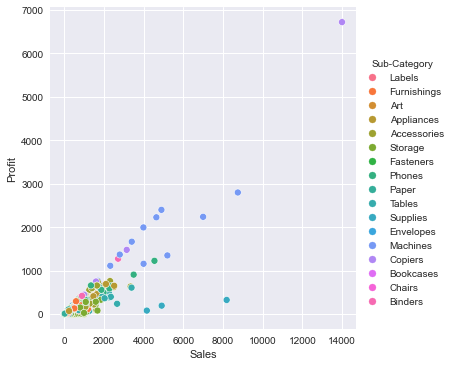

In [15]:
sns.relplot(x='Sales',y='Profit',hue='Sub-Category',data=main_data_discout_zero)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

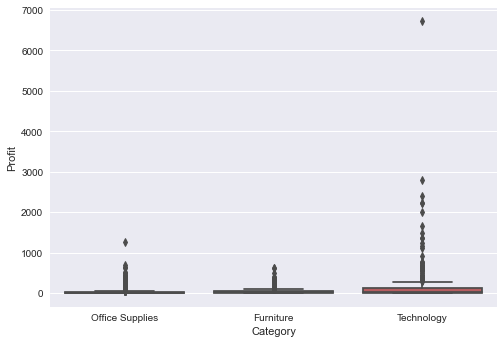

In [16]:
sns.boxplot(x='Category',y='Profit',data=main_data_discout_zero)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

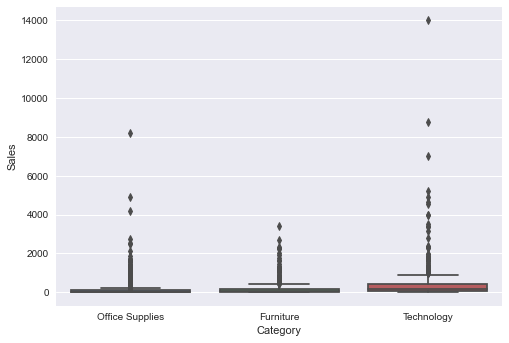

In [17]:
sns.boxplot(x='Category',y='Sales',data=main_data_discout_zero)

<AxesSubplot:xlabel='Sub-Category'>

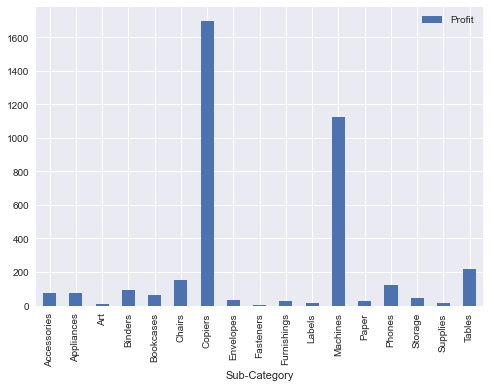

In [18]:
pivot=pd.pivot_table(main_data_discout_zero,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

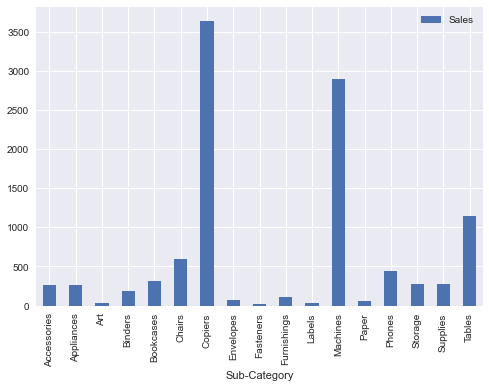

In [19]:
pivot=pd.pivot_table(main_data_discout_zero,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

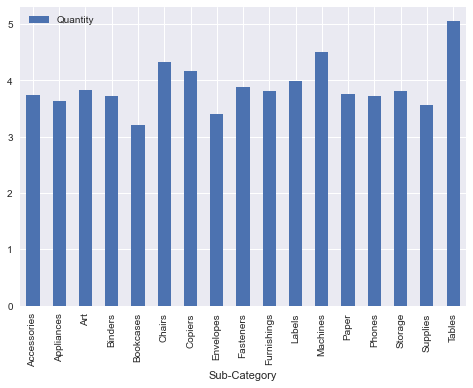

In [20]:
pivot=pd.pivot_table(main_data_discout_zero,index='Sub-Category',values='Quantity')
pivot.plot(kind='bar')

Now we will look at their stats on providing discounts

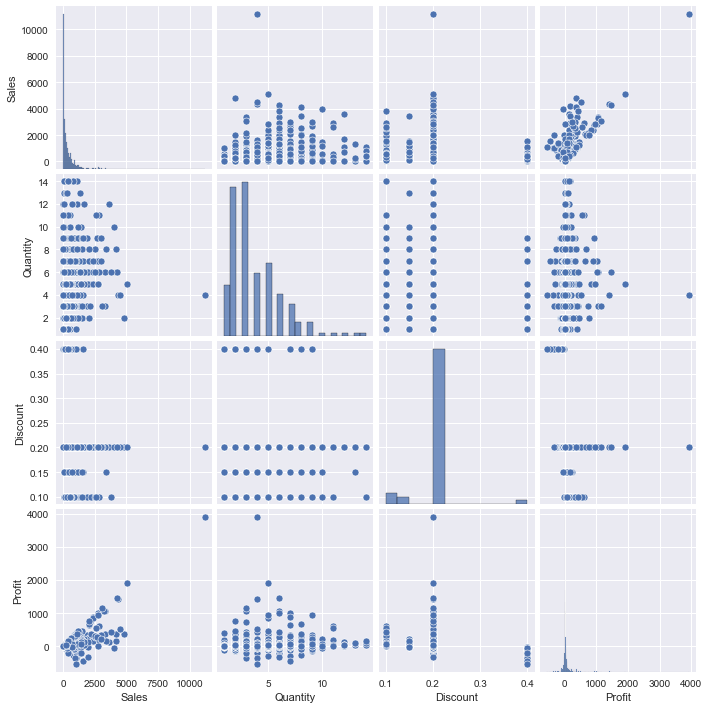

In [21]:
main_data_discout=main_data[main_data['Discount']!=0]
main_financial_discount=main_data_discout.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(main_financial_discount)

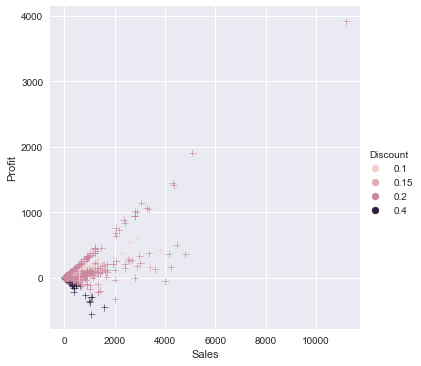

In [22]:
sns.relplot(x='Sales',y='Profit',hue='Discount',data=main_data_discout,marker="+")

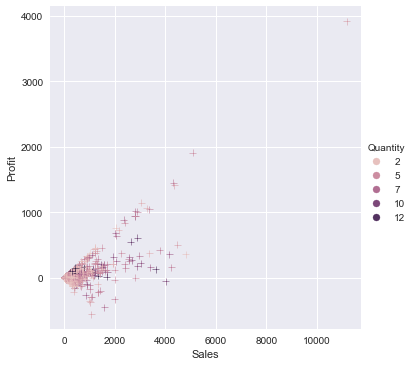

In [23]:
sns.relplot(x='Sales',y='Profit',hue='Quantity',data=main_data_discout,marker="+")

<AxesSubplot:>

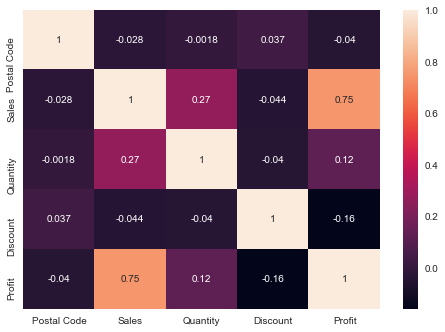

In [24]:
corr1=main_data_discout.corr()
sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns,annot=True)

<AxesSubplot:xlabel='Sub-Category'>

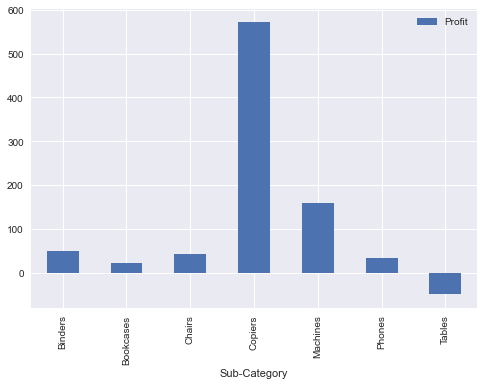

In [25]:
pivot=pd.pivot_table(main_data_discout,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

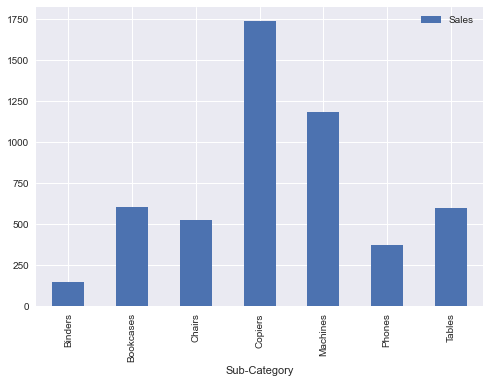

In [26]:
pivot=pd.pivot_table(main_data_discout,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

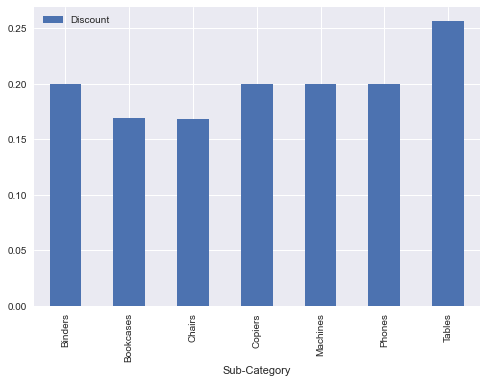

In [27]:
pivot=pd.pivot_table(main_data_discout,index='Sub-Category',values='Discount')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

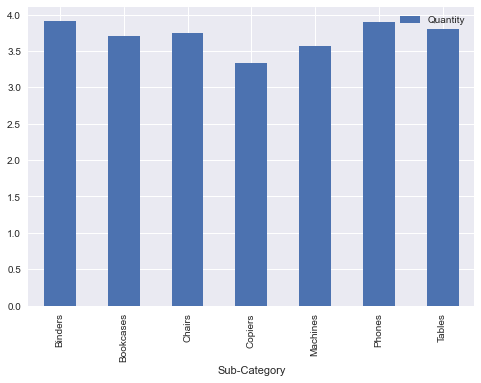

In [28]:
pivot=pd.pivot_table(main_data_discout,index='Sub-Category',values='Quantity')
pivot.plot(kind='bar')

# Profit distribution across region in different regions 

In [29]:
secondary_data=store_data[(store_data.State!='California') | (store_data.State!='Michigen') | (store_data.State!='New York') | (store_data.State!='Virginia') | (store_data.State!='Washington')]
len(secondary_data)

9977

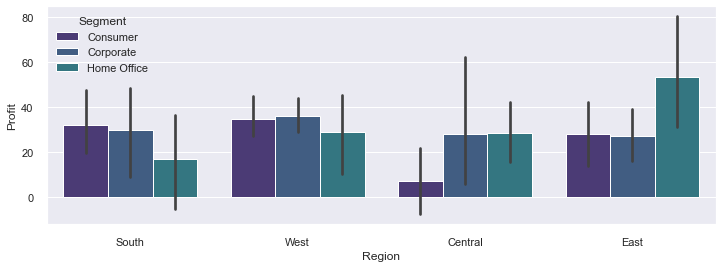

In [30]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = secondary_data , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

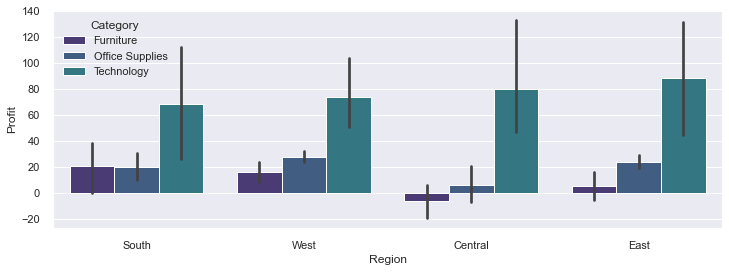

In [31]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = secondary_data , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

# Separately investigating Central Region 

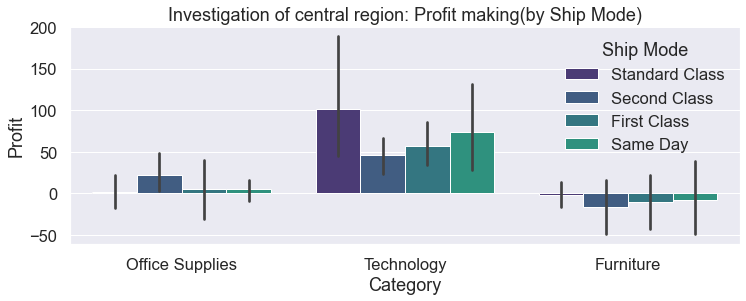

In [47]:
#Grouping Data by Region and only slicing Data for Central Region from whole Data Set
gb_Central = list(secondary_data.groupby("Region"))[0][1]
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

In [33]:
furniture_category=secondary_data[secondary_data['Category']=='Furniture']
len(furniture_category)

2118

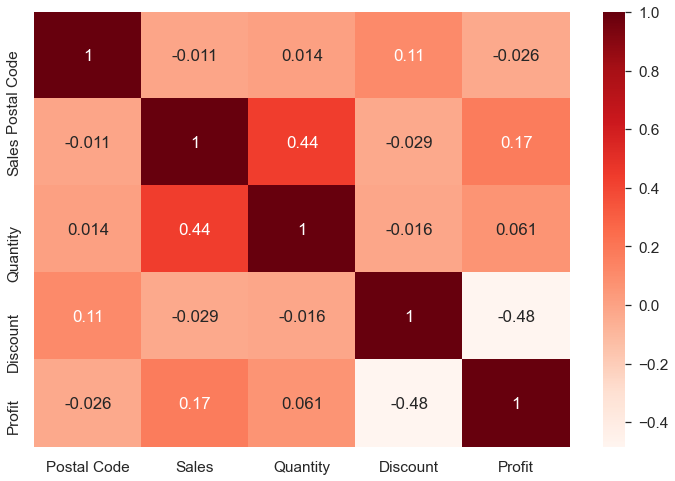

In [34]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(furniture_category.corr() , annot = True, cmap ="Reds")
plt.show()

# Investigating individual performance by states in the central region 

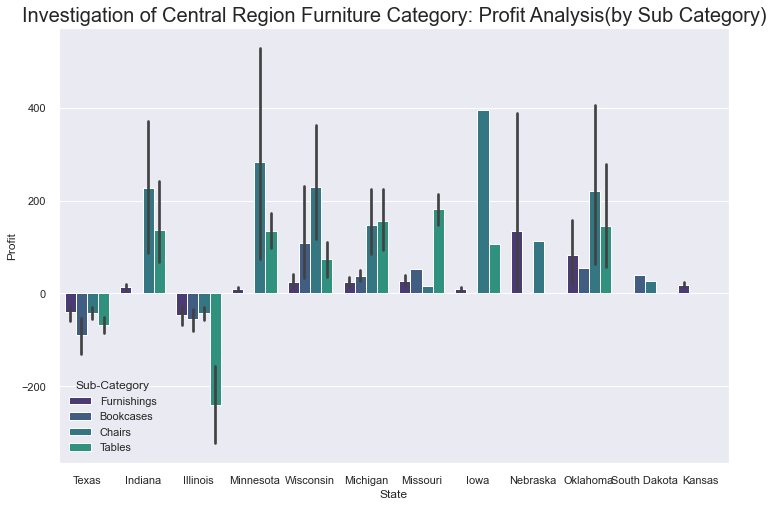

In [56]:
#states with no profit's
no_profit=list(list(secondary_data.groupby("Region"))[0][1].groupby("Category"))[0][1]
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = no_profit , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

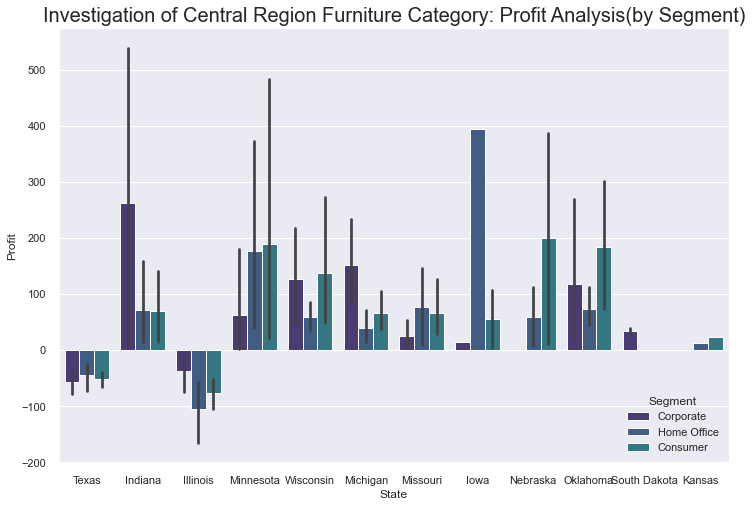

In [58]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = no_profit , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

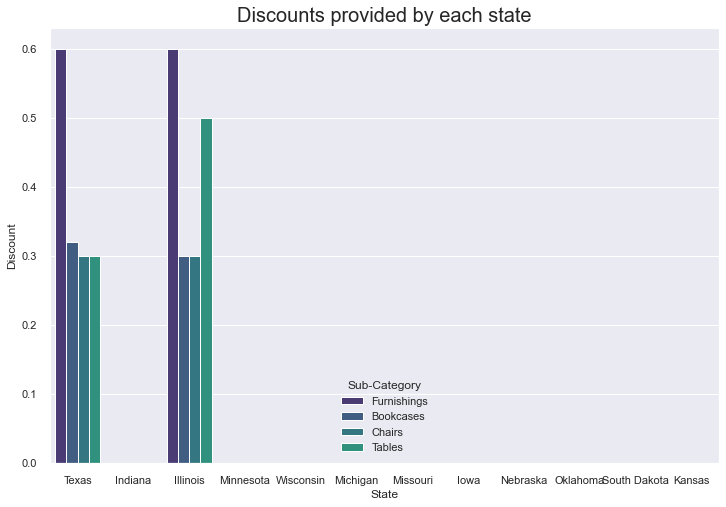

In [59]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = no_profit , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

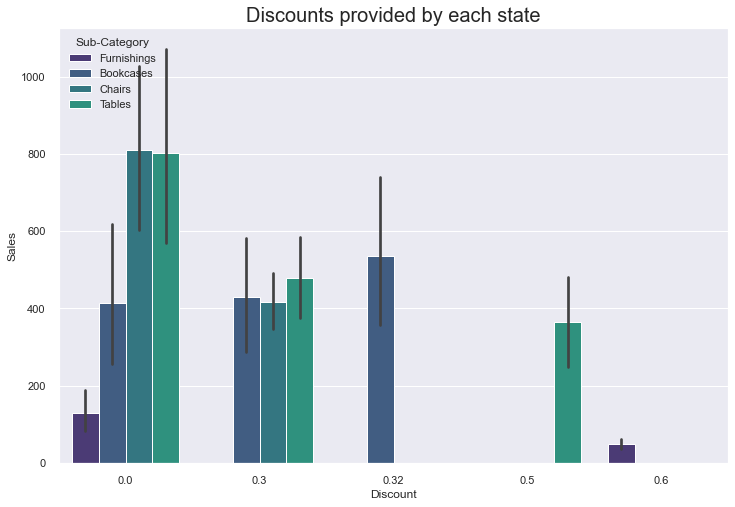

In [61]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = no_profit , x = "Discount",y = "Sales" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Category'>

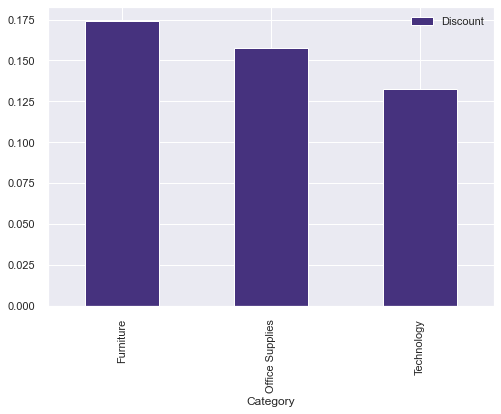

In [63]:
pivot=pd.pivot_table(store_data,index='Category',values='Discount')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

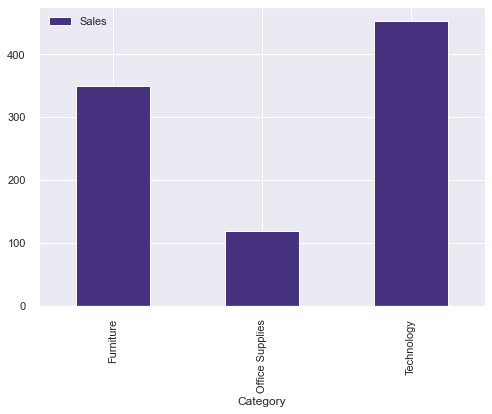

In [64]:
pivot=pd.pivot_table(store_data,index='Category',values='Sales')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

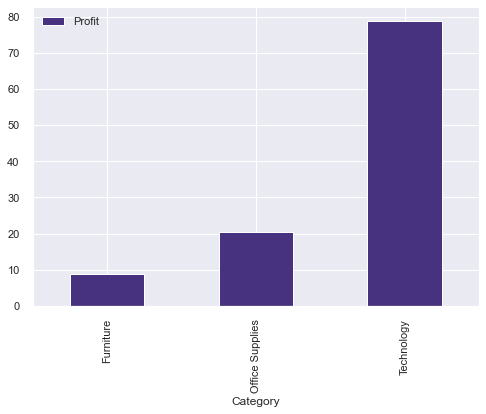

In [65]:
pivot=pd.pivot_table(store_data,index='Category',values='Profit')
pivot.plot(kind='bar')

# Insights from the complete data analysis
# 1) Providing more discounts will result in increase of sales but will also decrease profit.
# 2) Technology is the major area which gives more profit as they provide less discount in this area only.
# 3) Areas with having profit should focus on sub-categories like:- 'Fasteners', 'Labels', and 'Art'.
# 4) Texas and Illinois should change their strategy and focus on getting profit.
# 5) Selling of consumer products will rise the profit in these areas.